# Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Reading CSV File

In [10]:
ds = pd.read_csv('/content/TSLA CSV.csv')
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


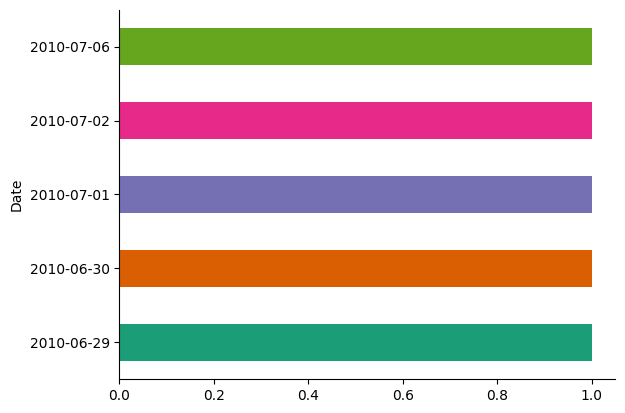

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# No. of Rows and Columns

In [11]:
ds.shape

(2416, 7)

# Description of Dataset

In [14]:
ds.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


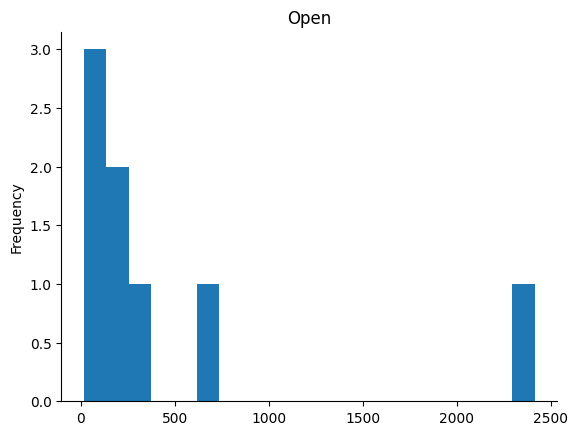

In [15]:
from matplotlib import pyplot as plt
_df_21['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Exploratory Data Analysis

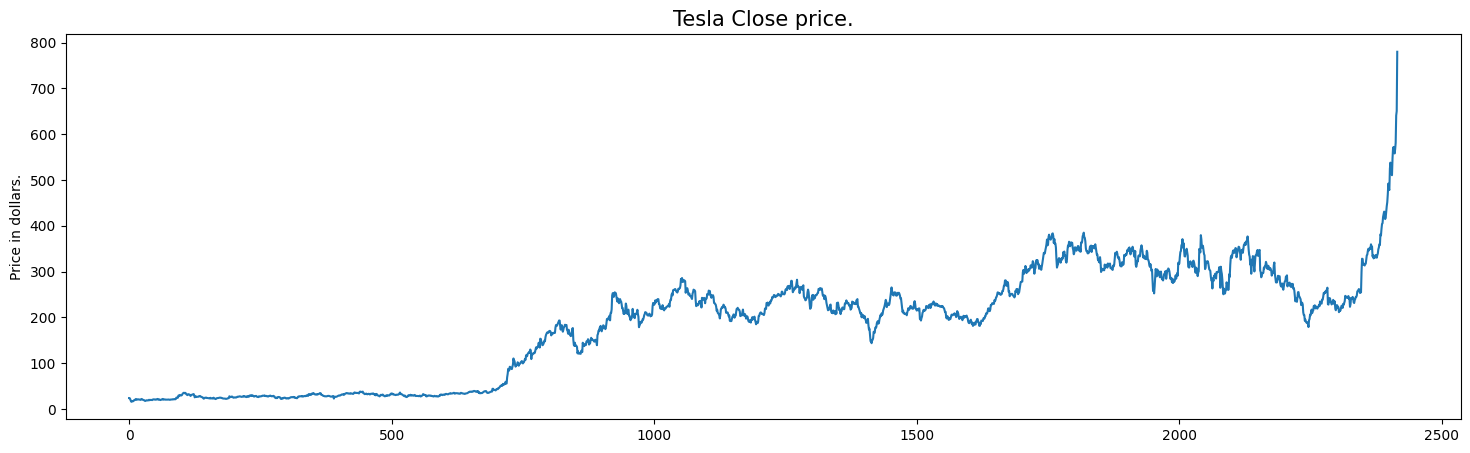

In [17]:
plt.figure(figsize= (18,5))  # dims of graph
plt.plot(ds['Close'])
plt.title('Tesla Close price.', fontsize=15)  # title
plt.ylabel('Price in dollars.')   # labelling y axis
plt.show() # displaying graph plot

In [31]:
# Adding columns
ds['open-close']  = ds['Open'] - ds['Close']
ds['low-high']  = ds['Low'] - ds['High']
ds['target'] = np.where(ds['Close'].shift(-1) > ds['Close'], 1, 0)

# Pie chart of Dataset  

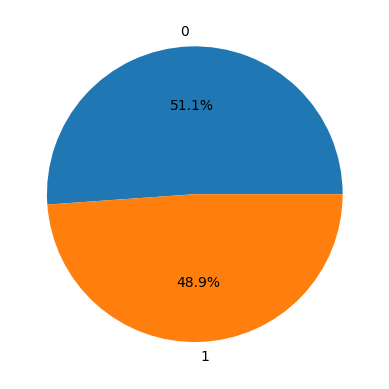

In [32]:
plt.pie(ds['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

# Heatmap

<ipython-input-34-a6bb09843899>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(ds.corr() > 0.9, annot=True, cbar=False)


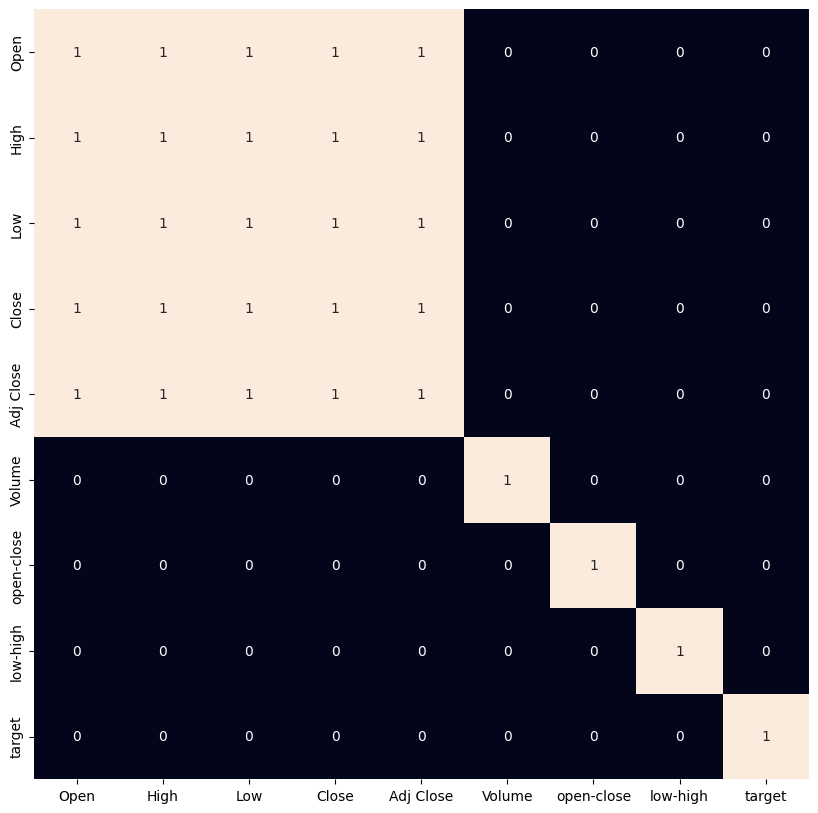

In [34]:
plt.figure(figsize=(10, 10))
sb.heatmap(ds.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Data Splitting and Normalization:

In [38]:
features = ds[['open-close', 'low-high']]
target = ds['target']

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target, test_size=0.1, random_state=2022)

print(X_train.shape, X_val.shape)

(2174, 2) (242, 2)


# Model Development and Evaluation

In [40]:
# Training accuracy and validation accuracy
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
for model in models:
    model.fit(X_train, y_train)
    print(f'{model} : ')
    print('The Training Accuracy of the model is: ', metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    print('The Validation Accuracy of the model is: ', metrics.roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))
    print()

LogisticRegression() : 
The Training Accuracy of the model is:  0.5056219493093215
The Validation Accuracy of the model is:  0.4848795840175151

SVC(kernel='poly', probability=True) : 
The Training Accuracy of the model is:  0.5283976174449765
The Validation Accuracy of the model is:  0.4610016420361248

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None

# Confusion Matrix

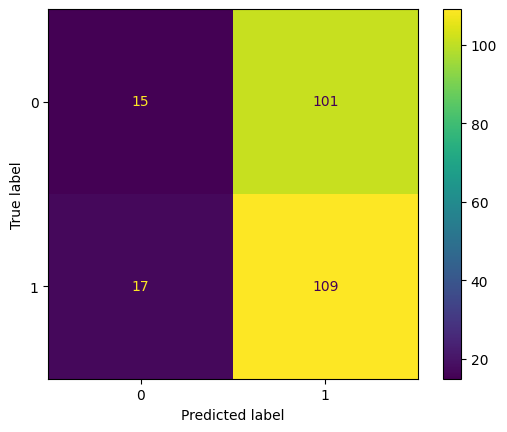

In [48]:
y_pred = models[0].predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()
